In [2]:
import cv2 as cv
import pytesseract 
import matplotlib.pyplot as plt
import re
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv.imread('carte_identité.jpeg')
real_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(real_img)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


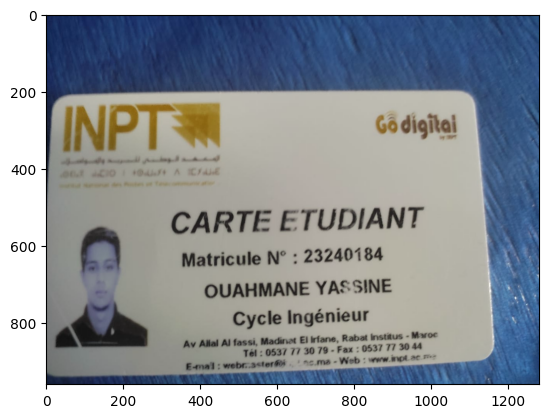

In [3]:
image = cv.rotate(img,cv.ROTATE_180)
ready_image = cv.rotate(image,cv.ROTATE_90_CLOCKWISE)
plt.imshow(ready_image)

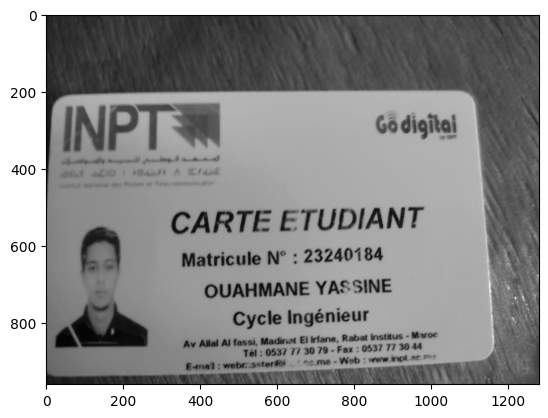

In [4]:
gray = cv.cvtColor(ready_image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

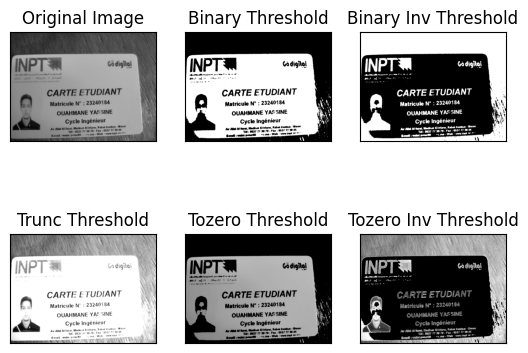

In [5]:
_,binary_thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# Apply binary inverse thresholding
_, binary_inv_thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

# Apply trunc thresholding
_, trunc_thresh = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

# Apply tozero thresholding
_, tozero_thresh = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO)

# Apply tozero inverse thresholding
_, tozero_inv_thresh = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO_INV)

# Display the images
titles = ['Original Image', 'Binary Threshold', 'Binary Inv Threshold', 'Trunc Threshold', 'Tozero Threshold', 'Tozero Inv Threshold']
images = [gray, binary_thresh, binary_inv_thresh, trunc_thresh, tozero_thresh, tozero_inv_thresh]
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])


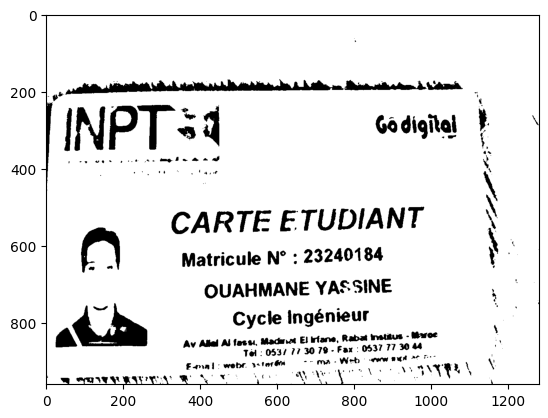

In [12]:
Adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,99,31)
plt.imshow(Adaptive_thresh, 'gray')

In [13]:
result = pytesseract.image_to_string(Adaptive_thresh)
result

'tank\n\nIN P T331 Gédlgitgj 2 \\\n\ns\n\\\n\n \n\n.“5\n\n)\n\n\\\nCARTE ETUDIANT \\\n\nc J Matricule N° : 23240184 !\\ f“\nOUAHMANE YASSINE ‘ \'-\n\n‘Q Cycle Ingénieur " ~\nAvlldutuu.muﬂﬂm.lade-Moc \\\n\n161:063/113079-FI1106317730‘4\ns Flu-II \' mm aunt” - > m A Wm w“ I“ >r ru- \'.\n‘I W"\\“\\\\‘f"~‘.‘\\‘ ‘ 3‘ r x“ m“ an“ \\- .. \\ ‘ - .\\ ~. ",\\"“!. \\‘ \\\n‘ . m .. ~\n\\\n\n,«‘—ol-a-4\n\nmu"\n\n'

In [16]:

# Expressions régulières pour extraire les informations
matricule_pattern = re.compile(r'Matricule\s*N°\s*:\s*(\d+)', re.IGNORECASE)
Type_card_pattern = re.compile(r'\b[A-Z]+\s*[A-Z]+\s*[^\n][A-Z]*\b')
cycle_pattern = re.compile(r'Cycle\s*Ing(e|é)nieur', re.IGNORECASE)

# Recherche des motifs dans le résultat

matricule_match = matricule_pattern.search(result)
list_ = Type_card_pattern.findall(result)
list_ = [el for el in list_ if len(el) >= 10]         
Type_card_match,name = list_[0],list_[1]
cycle_match = cycle_pattern.search(result)

# Extraction des informations trouvées

matricule = matricule_match.group(1) if matricule_match else "Not found"
Type_card = Type_card_match if Type_card_match else "Not found"
cycle = cycle_match.group(0) if cycle_match else "Not found"
cycle = "Cycle "+cycle[6:].replace("l", "I") if cycle else "Not found"

print("Name:", name)
print("Matricule:", matricule)
print("Type_card:", Type_card)
print("Cycle:", cycle)




Name: OUAHMANE YASSINE
Matricule: 23240184
Type_card: CARTE ETUDIANT
Cycle: Cycle Ingénieur
